Accuracy with Manhattan distance: 1.0000
Accuracy with Euclidean distance: 1.0000


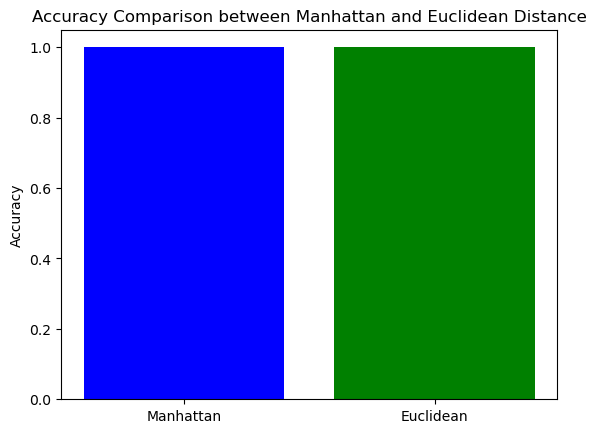

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y)) 

knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric=manhattan_distance)
knn_manhattan.fit(X_train, y_train)

y_pred_manhattan = knn_manhattan.predict(X_test)

knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)

y_pred_euclidean = knn_euclidean.predict(X_test)

accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

print(f"Accuracy with Manhattan distance: {accuracy_manhattan:.4f}")
print(f"Accuracy with Euclidean distance: {accuracy_euclidean:.4f}")

labels = ['Manhattan', 'Euclidean']
accuracies = [accuracy_manhattan, accuracy_euclidean]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Manhattan and Euclidean Distance')
plt.show()
